### Data Exploration and Preprocessing 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('housing.csv')

# Initial data exploration
print(data.head())
print(data.describe())
print(data.info())

# Handling missing values
# Assuming 'total_bedrooms' has missing values
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

# Removing outliers
# Example: Remove outliers in 'median_house_value'
q1 = data['median_house_value'].quantile(0.25)
q3 = data['median_house_value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data = data[(data['median_house_value'] >= lower_bound) & (data['median_house_value'] <= upper_bound)]

# Normalizing data
# Example: Normalize 'median_income'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['median_income'] = scaler.fit_transform(data[['median_income']])

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

### Feature Engineering

In [2]:
# Creating new features
# data['rooms_per_household'] = data['total_rooms'] / data['households']
# data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
# data['population_per_household'] = data['population'] / data['households']

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame loaded from 'housing.csv'
# Add the feature engineering step here
data['rooms_per_household'] = data['total_rooms'] / data['households']
data['bedrooms_per_room'] = data['total_bedrooms'] / data['total_rooms']
data['population_per_household'] = data['population'] / data['households']

# Proceed with encoding, splitting, and any preprocessing
# data_encoded = pd.get_dummies(data, columns=['ocean_proximity'])

# X = data_encoded.drop('median_house_value', axis=1)
# y = data_encoded['median_house_value']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you've already trained your RandomForestRegressor model: rf_model

### Model Implementation and Baseline Comparison

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# One-hot encode the 'ocean_proximity' column
data_encoded = pd.get_dummies(data, columns=['ocean_proximity'])

# Preparing data for training with the encoded dataset
X = data_encoded.drop('median_house_value', axis=1)
y = data_encoded['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Optionally, scale the data if you're also using models that are sensitive to feature scaling
# Note: Random Forest does not require feature scaling, but it's necessary for Linear Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Implementing and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Implementing and training the Linear Regression model as a baseline
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Making predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluating both models
rf_mse = mean_squared_error(y_test, rf_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
print(f"Random Forest MSE: {rf_mse}")
print(f"Linear Regression MSE: {lr_mse}")

rf_r2 = r2_score(y_test, rf_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Random Forest R² score: {rf_r2}")
print(f"Linear Regression R² score: {lr_r2}")

Random Forest MSE: 1937742847.0872324
Linear Regression MSE: 3414696323.365757
Random Forest R² score: 0.7904735715337182
Linear Regression R² score: 0.63077189214903


In [4]:
### Visualizations for Data Exploration

/Users/kenny/anaconda3/envs/SampleAI/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


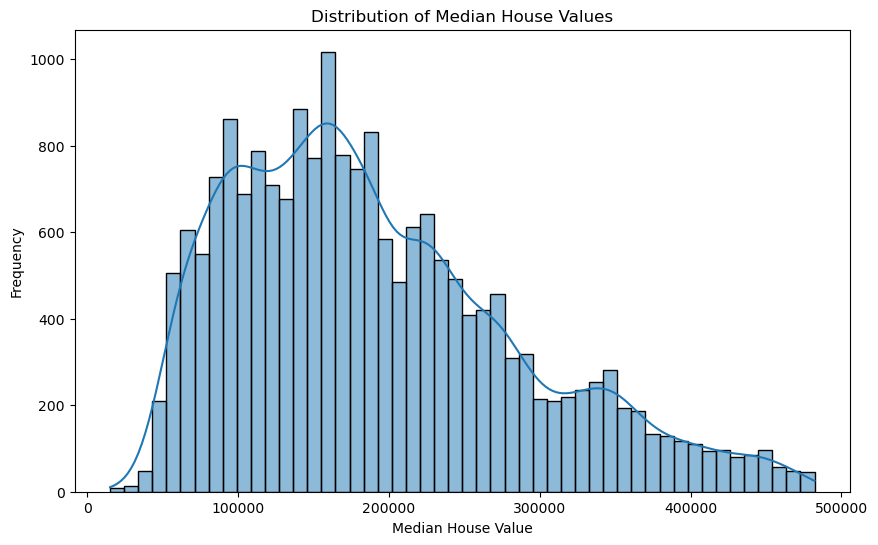

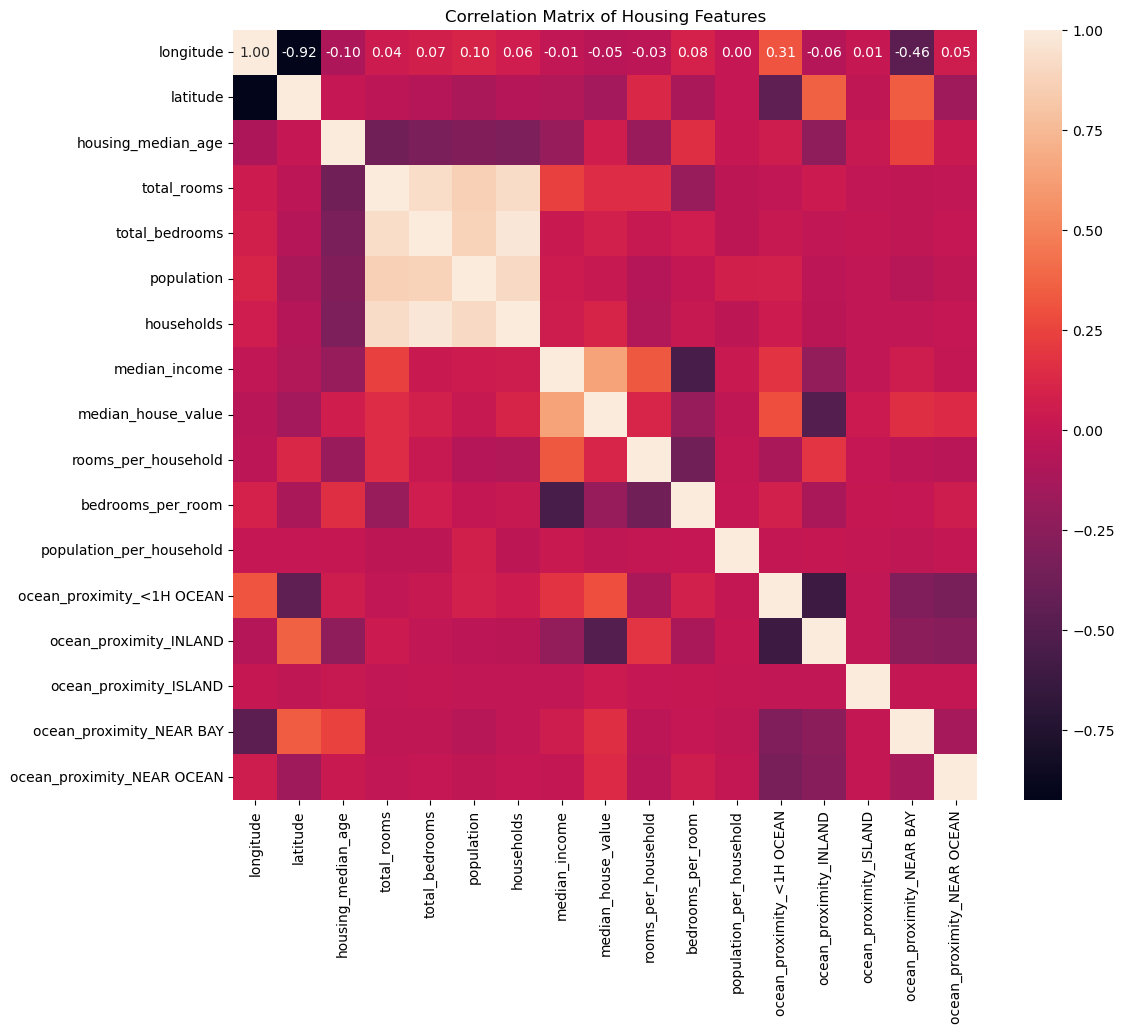

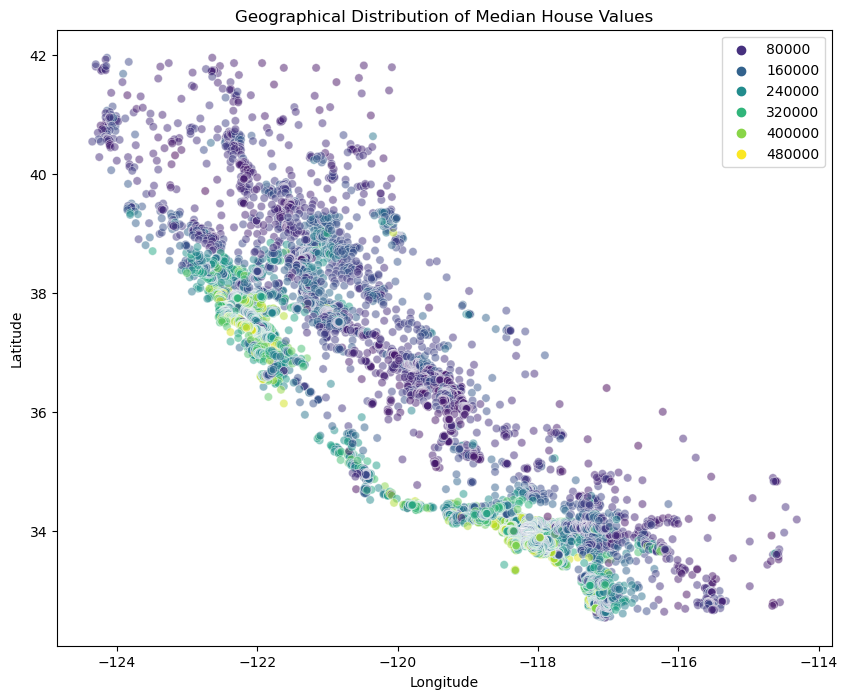

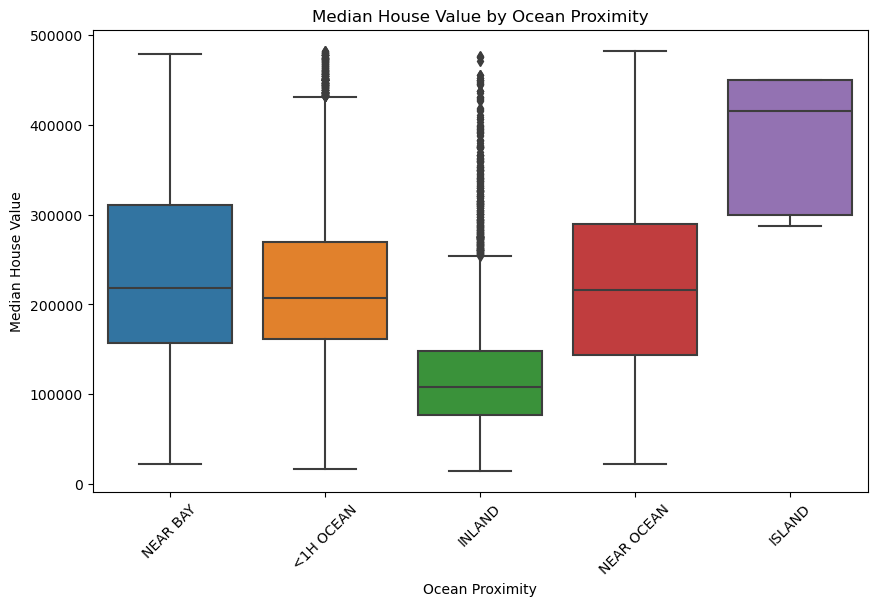

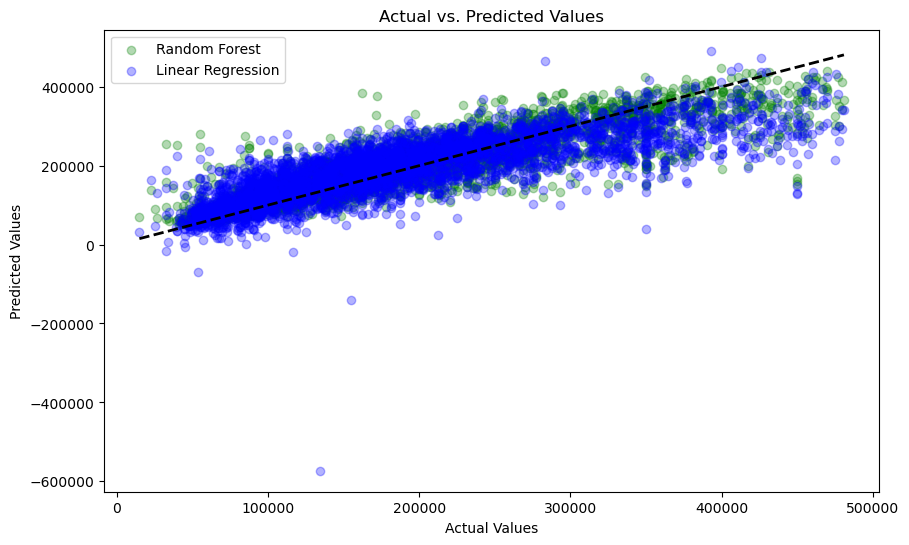

/Users/kenny/anaconda3/envs/SampleAI/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenny/anaconda3/envs/SampleAI/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


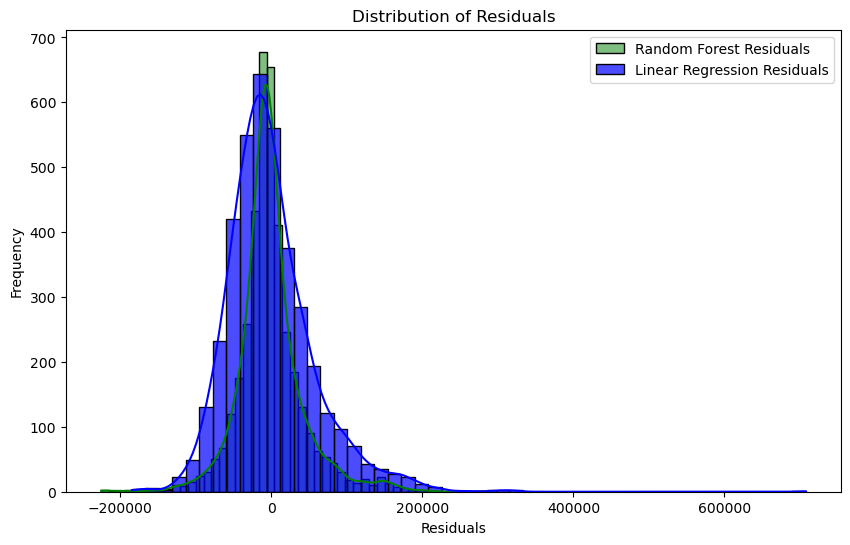

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable (median house value)
plt.figure(figsize=(10, 6))
sns.histplot(data['median_house_value'], bins=50, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_encoded.corr(), annot=True, fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

# Scatter plot of geographical data colored by median house value
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=data_encoded, hue='median_house_value', palette='viridis', alpha=0.5)
plt.title('Geographical Distribution of Median House Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

# Box plot for median house value by ocean proximity
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.xticks(rotation=45)
plt.show()


# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.3, label='Random Forest', color='green')
plt.scatter(y_test, lr_predictions, alpha=0.3, label='Linear Regression', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Histogram of the residuals
plt.figure(figsize=(10, 6))
sns.histplot(y_test - rf_predictions, bins=50, kde=True, color='green', label='Random Forest Residuals')
sns.histplot(y_test - lr_predictions, bins=50, kde=True, color='blue', alpha=0.7, label='Linear Regression Residuals')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [6]:
### Feature Importance Visualization

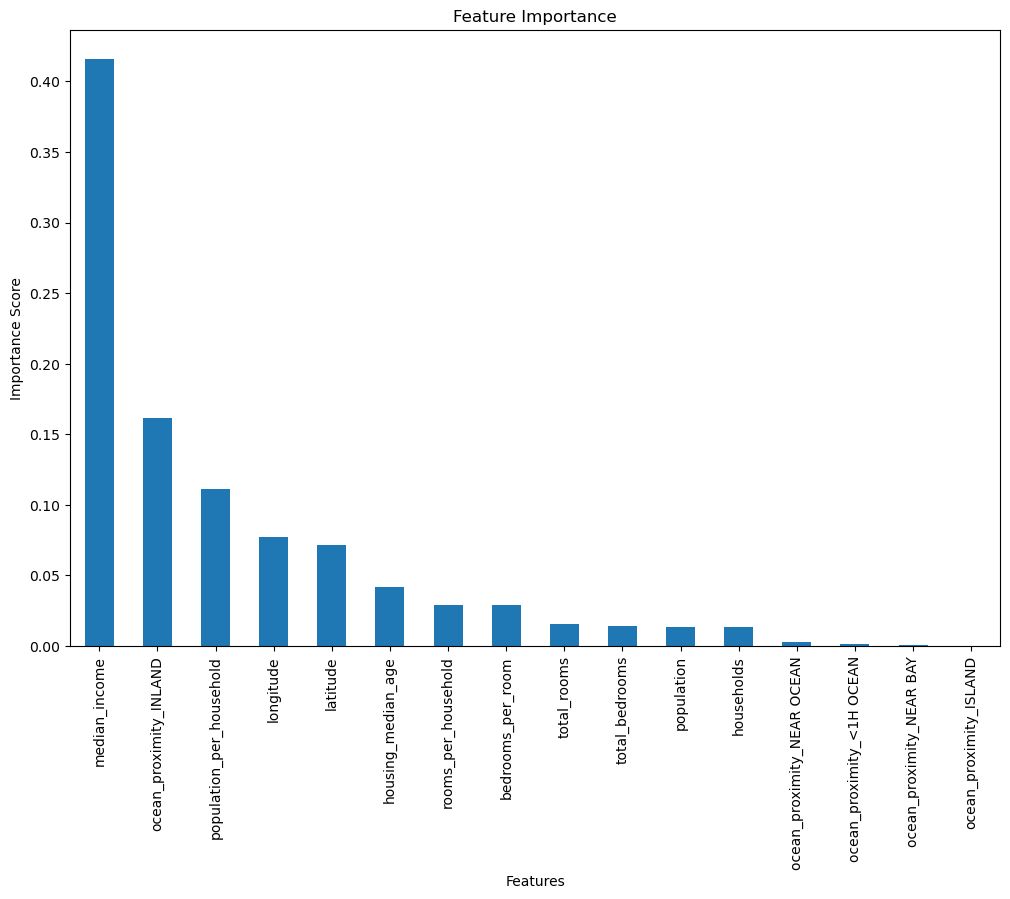

/Users/kenny/anaconda3/envs/SampleAI/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenny/anaconda3/envs/SampleAI/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenny/anaconda3/envs/SampleAI/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kenny/anaconda3/envs/SampleAI/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

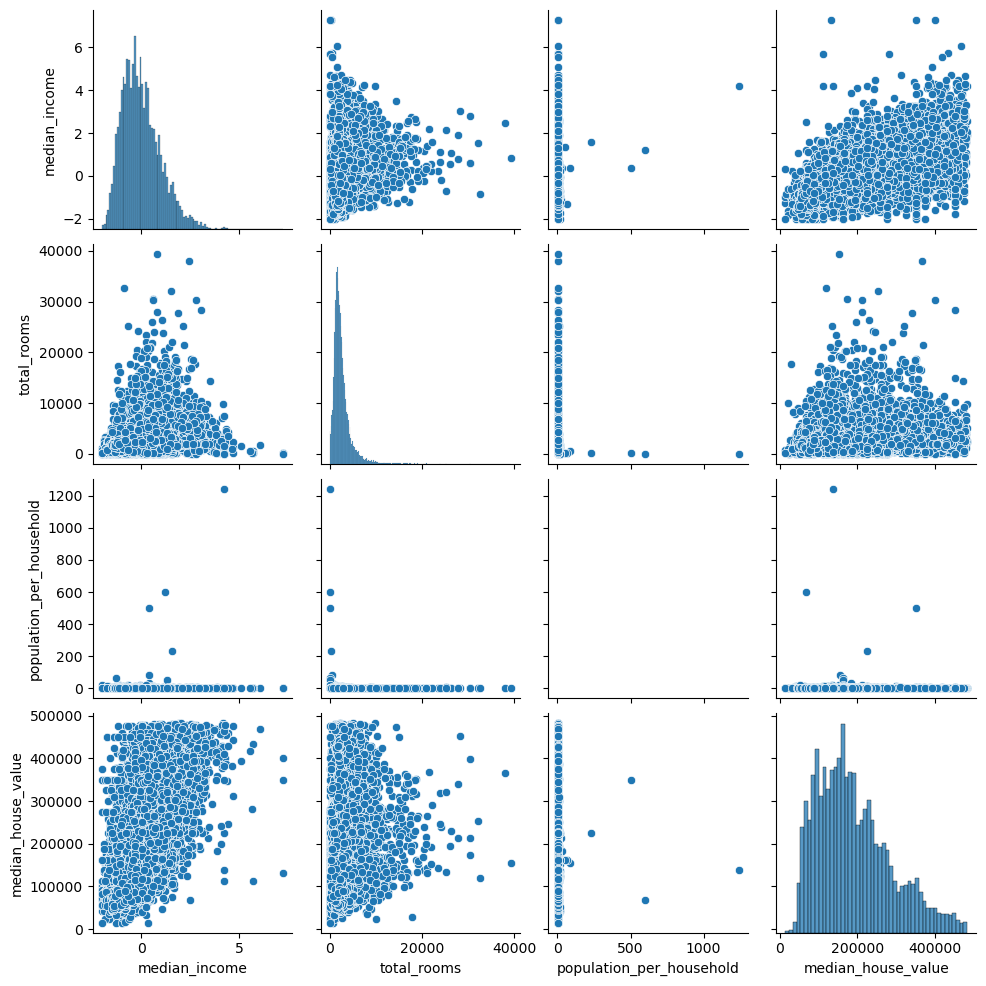


KeyboardInterrupt



In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'rf_model' is your trained Random Forest model
# feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)


# Correcting the feature importances plotting code
# Assuming 'data_encoded' is your DataFrame and 'median_house_value' is the target variable
# feature_names = data_encoded.drop('median_house_value', axis=1).columns
# feature_importances = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)

# plt.figure(figsize=(12, 8))
# feature_importances.plot(kind='bar')
# plt.title('Feature Importance')
# plt.xlabel('Features')
# plt.ylabel('Importance Score')
# plt.show()
# Now, let's correct the feature importance visualization using the updated 'X_train'
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

# Pair Plot for Key Features
# Selecting a subset of features for visualization
features = ['median_income', 'total_rooms', 'population_per_household', 'median_house_value']
subset_data = data[features]

sns.pairplot(subset_data)
plt.show()



# Learning Curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=RandomForestRegressor(n_estimators=100, random_state=42),
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.01, 1.0, 50),
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

train_scores_mean = -train_scores.mean(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, label='Training error')
plt.plot(train_sizes, validation_scores_mean, label='Validation error')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Error Distribution Plot
# Calculating residuals for the Random Forest model
rf_residuals = y_test - rf_predictions

plt.figure(figsize=(10, 6))
sns.kdeplot(rf_residuals, fill=True)
plt.title('Distribution of Random Forest Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.show()


In [ ]:
### Actual vs. Predicted Values with Confidence Interval

In [ ]:
# Assuming a simple linear regression for demonstration
import numpy as np

# Confidence interval calculation
ci = 1.96 * np.std(lr_predictions)/np.mean(lr_predictions)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_predictions, alpha=0.3, label='Predictions')
plt.fill_between(y_test, lr_predictions-ci, lr_predictions+ci, color='b', alpha=0.1, label='95% Confidence Interval')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.title('Actual vs. Predicted Values with Confidence Interval')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
